<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Pr%C3%A1ctico6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 6

## Ejercicio 1

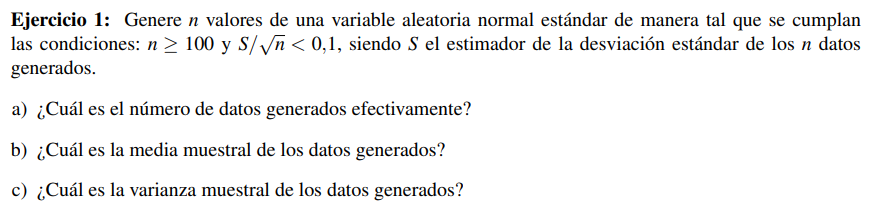

In [18]:
# @title Variable Aleatoria Normal
from random import random
from numpy import log, sqrt


def normal_estandar_ayr():
    """Variable aleatoria con distribución normal estándar"""
    while True:
        Y1 = -log(1 - random())
        Y2 = -log(1 - random())
        if Y2 >= (Y1 - 1) ** 2 / 2:
            return Y1 if random() < 0.5 else -Y1

In [19]:
# @title Codigo
from math import sqrt


def estimadores_de_X(d):
    """
    Genera estimaciones de la media y la varianza de una distribución
    normal estándar utilizando simulaciones hasta que el error estándar
    sea menor o igual a un umbral `d`.
    """
    media = normal_estandar_ayr()  # Primer valor de X
    var_acumulada = 0.0  # Varianza acumulada (S^2)
    n = 1  # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = normal_estandar_ayr()

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = (
            var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2
        )

    return media, var_acumulada, n

In [20]:
#@title Resultado
from random import seed

seed(1) # Esto es para que no cambie el numero de simulaciones

resultados = estimadores_de_X(0.1)

print(" Resultados de la simulación ".center(40, "-"))
print(f" - Número de simulaciones : {str(resultados[2]).rjust(10)}")
print(f" - Media estimada         : {resultados[0]:>10.4f}")
print(f" - Varianza estimada      : {resultados[1]:>10.4f}")
print("-" * 40)

----- Resultados de la simulación ------
 - Número de simulaciones :        101
 - Media estimada         :     0.1200
 - Varianza estimada      :     0.8694
----------------------------------------


## Ejercicio 2

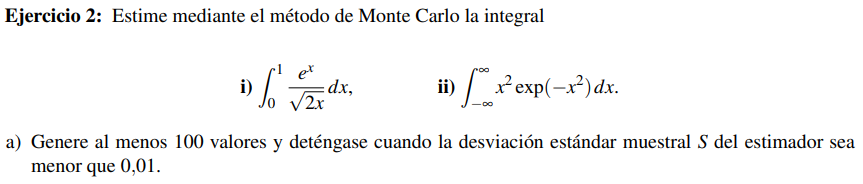

### i)

$$
\int_0^1 \frac{e^x}{\sqrt{2x}}
$$

In [21]:
# @title Codigo
from random import random
from numpy import sqrt, exp


def ej2i_f(x):
    return exp(x) / sqrt(2 * x)


def estimacion_del_ej2i(d):
    media = ej2i_f(random())  # Primer valor de X
    var_acumulada = 0.0  # Varianza acumulada (S^2)
    n = 1  # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = ej2i_f(random())

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = (
            var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2
        )

    return media, var_acumulada, n

In [22]:
# @title Resultados
from random import seed

seed(1)  # Esto es para que no cambie el numero de simulaciones

resultados = estimacion_del_ej2i(0.01)

print(" Resultados de la simulación ".center(40, "-"))
print(f" - Número de simulaciones : {str(resultados[2]).rjust(10)}")
print(f" - Media estimada         : {resultados[0]:>10.4f}")
print(f" - Varianza estimada      : {resultados[1]:>10.4f}")
print(f" - Resultado de la integ  : {resultados[0]:>10.4f}")
print("-" * 40)

----- Resultados de la simulación ------
 - Número de simulaciones :      29837
 - Media estimada         :     2.0809
 - Varianza estimada      :     2.9837
 - Resultado de la integ  :     2.0809
----------------------------------------


### ii)

$$
\int_{-∞}^{∞} x^2⋅e^{-x^2} dx
$$

Defino:

$$
f(x) = x^2⋅e^{-x^2}
$$


claramente es simetrica por el [grafico en desmos](https://www.desmos.com/calculator/0v35tuxlbn), por lo tanto tenemos que:

$$
\int_{-∞}^{∞} f(x) dx = 2⋅\int_{0}^{∞} f(x) dx
$$

hacemos el cambio de variable $y = 1/(x+1)$ para esta en el $0,1$ por lo tanto nos queda que si:

$$
2⋅\int_{0}^{∞} f(x) dx = 2 ⋅ \int_{0}^{1} \frac{f(\frac{1}{y} -1)}{y^2} dy
$$


finalmente:

$$
\int_{-∞}^{∞} f(x) dx = 2 ⋅ \int_{0}^{1} \frac{f(\frac{1}{y} -1)}{y^2} dy
$$


In [23]:
# @title Codigo
from random import random
from numpy import sqrt, exp


def ej2ii_f(x):
    return x ** 2 * exp(-(x ** 2))


def ej2ii_f_modificada(y):
    return ej2ii_f(1 / y - 1) / (y ** 2)


def estimacion_del_ej2ii(d):
    media = ej2ii_f_modificada(random())  # Primer valor de X
    var_acumulada = 0.0  # Varianza acumulada (S^2)
    n = 1  # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = ej2ii_f_modificada(random())

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = (
            var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2
        )

    return media, var_acumulada, n

In [24]:
# @title Resultados
from random import seed

seed(1)  # Esto es para que no cambie el numero de simulaciones

resultados = estimacion_del_ej2ii(0.01)

print(" Resultados de la simulación ".center(40, "-"))
print(f" - Número de simulaciones : {str(resultados[2]).rjust(10)}")
print(f" - Media estimada         : {resultados[0]:>10.4f}")
print(f" - Varianza estimada      : {resultados[1]:>10.4f}")
print(f" - Resultado de la integ  : {2*resultados[0]:>10.4f}")
print("-" * 40)

----- Resultados de la simulación ------
 - Número de simulaciones :       3132
 - Media estimada         :     0.4380
 - Varianza estimada      :     0.3130
 - Resultado de la integ  :     0.8760
----------------------------------------


## Ejercicio 3

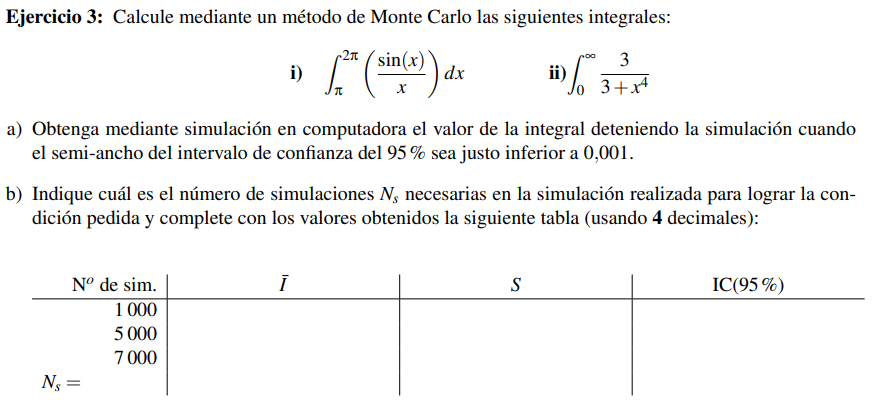

In [25]:
#@title Calculo simbolico de las intergrales
import sympy as sp

x = sp.symbols('x')

print("-"*50)
expr_i = sp.sin(x)/x
res = sp.integrate(expr_i, (x, sp.pi, 2*sp.pi))
print("Resultado i) \n", res, f" = {res.evalf():.8f}")
print("-"*50)
expr_ii = x**2 * sp.exp(-x**2)
res = sp.integrate(expr_ii, (x, -sp.oo, sp.oo))
print("Resultado ii) \n", res, f" = {res.evalf():.8f}")
print("-"*50)

--------------------------------------------------
Resultado i) 
 -Si(pi) + Si(2*pi)  = -0.43378548
--------------------------------------------------
Resultado ii) 
 sqrt(pi)/2  = 0.88622693
--------------------------------------------------


In [26]:
#@title Calculos para a)
from random import random
from numpy import sqrt

def estimacion_del_ej3a(sim, z_alfa_2, L):
    d = L / (2 * z_alfa_2)
    media = sim(random()) # Primer valor de X
    var_acumulada = 0.0                 # Varianza acumulada (S^2)
    n = 1                               # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = sim(random())

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2

    intervalo = (media - z_alfa_2*sqrt(var_acumulada / n), media + z_alfa_2*sqrt(var_acumulada / n))
    return media, var_acumulada, intervalo, n

In [27]:
#@title Calculos para b)
from random import random
from numpy import sqrt

def estimacion_del_ej3b(sim, z_alfa_2, L, n):
    d = L / (2 * z_alfa_2)
    valores = [sim(random()) for _ in range(n)]
    media = sum(valores) / n
    var_acumulada = sum((x - media) ** 2 for x in valores) / (n-1)

    intervalo = (media - z_alfa_2*sqrt(var_acumulada / n), media + z_alfa_2*sqrt(var_acumulada / n))
    return media, var_acumulada, intervalo, n

In [28]:
#@title Funcion para mostrar resultados
from random import seed
from scipy.stats import norm

def print_result_ej3(sim):
    confianza = 0.95
    alfa = 1-confianza
    z_alfa_2 = abs(norm.ppf(alfa/ 2))

    seed(1) # Esto es para que no cambie el numero de simulaciones
    n_sim = [1000, 5000, 7000]

    resultados = [estimacion_del_ej3b(sim, z_alfa_2, 0.001, n) for n in n_sim]
    resultados.append(estimacion_del_ej3a(sim, z_alfa_2, 0.002))

    print("\n" + " Resultados de la simulación ".center(75, "-"))
    print(f"{'n_sim':>10} | {'Integral':>10} | {'Varianza':>10} | {'IC (95%)':^18} | {'Long. IC':>10}")
    print("-" * 75)

    # Filas
    for media, var, intervalo, n in resultados:
        long_ic = intervalo[1] - intervalo[0]
        print(f"{n:>10} | {media:10.4f} | {var:10.4f} | ({intervalo[0]:.4f}, {intervalo[1]:.4f}) | {long_ic:10.4f}")

    print("-" * 75)

In [29]:
#@title i)
from numpy import sin, pi

a,b = pi,2*pi

def ej3i_f(x):
    return sin(x)/x

def ej3i_f_modificada(y):
    return ej3i_f(a + (b - a)*y)*(b - a)

print_result_ej3(ej3i_f_modificada)


----------------------- Resultados de la simulación -----------------------
     n_sim |   Integral |   Varianza |      IC (95%)      |   Long. IC
---------------------------------------------------------------------------
      1000 |    -0.4297 |     0.0459 | (-0.4430, -0.4164) |     0.0266
      5000 |    -0.4334 |     0.0448 | (-0.4392, -0.4275) |     0.0117
      7000 |    -0.4312 |     0.0448 | (-0.4362, -0.4263) |     0.0099
    170688 |    -0.4334 |     0.0444 | (-0.4344, -0.4324) |     0.0020
---------------------------------------------------------------------------


In [30]:
#@title ii)
def ej3ii_f(x):
    return 3/(3+x**4)

def ej3ii_f_modificada(y):
    return ej3ii_f(1/y - 1)/(y**2)


print_result_ej3(ej3ii_f_modificada)


----------------------- Resultados de la simulación -----------------------
     n_sim |   Integral |   Varianza |      IC (95%)      |   Long. IC
---------------------------------------------------------------------------
      1000 |     1.4865 |     0.9277 | (1.4268, 1.5462) |     0.1194
      5000 |     1.4608 |     0.9613 | (1.4336, 1.4880) |     0.0544
      7000 |     1.4481 |     0.9628 | (1.4251, 1.4711) |     0.0460
   3663193 |     1.4615 |     0.9536 | (1.4605, 1.4625) |     0.0020
---------------------------------------------------------------------------


## Ejercicio 4

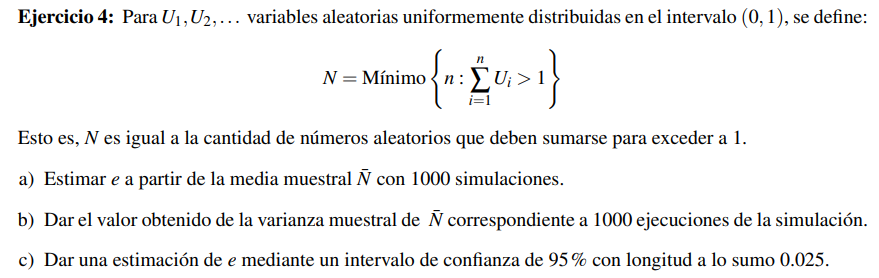


In [31]:
#@title Variable Aleatoria
from random import random
from numpy import sqrt

def va_N():
    n = 0
    acc = 0
    while acc < 1:
        acc += random()
        n += 1
    return n

In [32]:
#@title a y b)
from random import seed

seed(1)

def estimacion_del_ej4ab(n):
    valores = [va_N() for _ in range(n)]
    media = sum(valores) / n
    var = sum((x - media) ** 2 for x in valores) / (n-1)

    return media, var

media, var = estimacion_del_ej4ab(1_000)
print(f"Media:    {media:.4f}")
print(f"Varianza: {var:.4f}")

Media:    2.7250
Varianza: 0.7942


In [33]:
#@title c)
from scipy.stats import norm
from random import random, seed
from numpy import sqrt

def estimacion_del_ej4c(sim, z_alfa_2, L):
    d = L / (2 * z_alfa_2)
    media = sim()               # Primer valor de X
    var_acumulada = 0.0         # Varianza acumulada (S^2)
    n = 1                       # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = sim()

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2

    intervalo = (media - z_alfa_2*sqrt(var_acumulada / n), media + z_alfa_2*sqrt(var_acumulada / n))
    return media, var_acumulada, intervalo, n

confianza = 0.95
alfa = 1 - confianza
z_alfa_2 = abs(norm.ppf(alfa/ 2))

seed(1) # Esto es para que no cambie el numero de simulaciones

print("\n" + " Resultado de la simulación ".center(60, "-"))
print(f"{'n_sim':>10} | {'e':^10} | {'IC (95%)':^16} | {'Long. IC':>10}")
print("-" * 60)
media, _, intervalo, n = estimacion_del_ej4c(va_N, z_alfa_2, 0.025)
long_ic = intervalo[1] - intervalo[0]
print(f"{n:>10} | {media:^10.4f} | ({intervalo[0]:.4f}, {intervalo[1]:.4f}) | {long_ic:10.4f}")
print("-" * 60)


---------------- Resultado de la simulación ----------------
     n_sim |     e      |     IC (95%)     |   Long. IC
------------------------------------------------------------
     19072 |   2.7170   | (2.7045, 2.7295) |     0.0250
------------------------------------------------------------


## Ejercicio 5

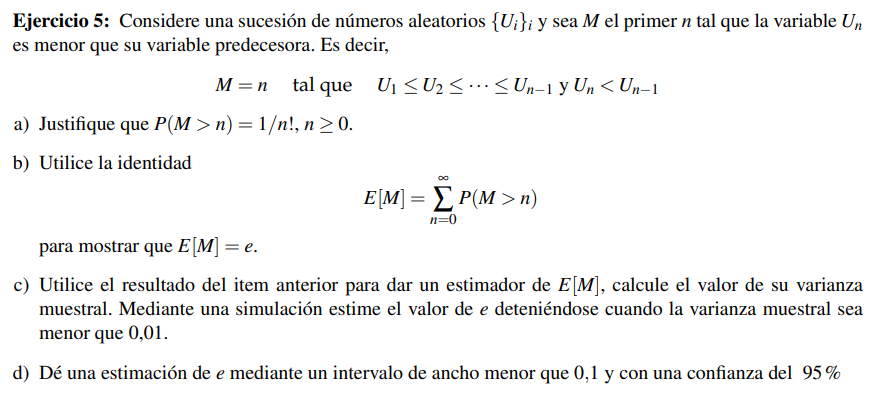

Sean $U_i$ uniformes en el $0,1$. Y la va tal que:

$$ M=n \text{ tal que } U_1 ≤ U_2 ≤ ⋯ ≤ U_{n-1} \text{ y ademas } U_n < U_{n-1} $$

In [34]:
#@title Codigo Variable Aleatoria
from random import random

def va_X_ej5():
    r = random()
    n = 1
    while True:
        new_r = random()
        n += 1

        if new_r < r:
            return n
        else:
            r = new_r

### a) 👷👷👷

Probar que $P(M > k) = 1/n!$ con $n≥0$.

### b)

Usando que $E[M] = \sum_{n=0}^{∞} P(M > n)$ probar que $E[M] = e$.

Esto sale facil porque $E[M] = \sum_{n=0}^{∞} P(M > n)$

\begin{align*}
E[M] & = \sum_{n=0}^{∞} P(M > n) \\
& = \sum_{n=0}^{∞} 1/n! \\
& = e \\
\end{align*}

### c)

In [35]:
#@title Codigo
from numpy import sqrt

def estimadores_de_X_ej5c(d):
    """
    Genera estimaciones de la media y la varianza de una distribución
    normal estándar utilizando simulaciones hasta que el error estándar
    sea menor o igual a un umbral `d`.
    """
    media = va_X_ej5()          # Primer valor de X
    var_acumulada = 0.0     # Varianza acumulada (S^2)
    n = 1                   # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = va_X_ej5()

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2

    return media, var_acumulada, n

In [36]:
#@title Resultado
from random import seed

seed(1) # Esto es para que no cambie el numero de simulaciones

print("\n" + " Resultado de la simulación ".center(36, "-"))
print(f"{'n_sim':>10} | {'media':^10} | {'var':^10}")
print("-" * 36)
media, var, n = estimadores_de_X_ej5c(0.01)
long_ic = intervalo[1] - intervalo[0]
print(f"{n:>10} | {media:^10.4f} | {var:^10.4f}")
print("-" * 36)


---- Resultado de la simulación ----
     n_sim |   media    |    var    
------------------------------------
      7601 |   2.7224   |   0.7600  
------------------------------------


### d)

In [37]:
#@title Codigo
from numpy import sqrt

def estimacion_del_ej5d(z_alfa_2, L):
    d = L / (2 * z_alfa_2)
    media = va_X_ej5()               # Primer valor de X
    var_acumulada = 0.0         # Varianza acumulada (S^2)
    n = 1                       # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = va_X_ej5()

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2

    intervalo = (media - z_alfa_2*sqrt(var_acumulada / n), media + z_alfa_2*sqrt(var_acumulada / n))
    return media, var_acumulada, intervalo, n

In [38]:
#@title Resultado
from random import seed
from scipy.stats import norm


confianza = 0.95
alfa = 1 - confianza
z_alfa_2 = abs(norm.ppf(alfa/ 2))

seed(1) # Esto es para que no cambie el numero de simulaciones

print("\n" + " Resultado de la simulación ".center(60, "-"))
print(f"{'n_sim':>10} | {'e':^10} | {'IC (95%)':^16} | {'Long. IC':>10}")
print("-" * 60)
media, _, intervalo, n = estimacion_del_ej5d(z_alfa_2, 0.1)
long_ic = intervalo[1] - intervalo[0]
print(f"{n:>10} | {media:^10.4f} | ({intervalo[0]:.4f}, {intervalo[1]:.4f}) | {long_ic:10.4f}")
print("-" * 60)


---------------- Resultado de la simulación ----------------
     n_sim |     e      |     IC (95%)     |   Long. IC
------------------------------------------------------------
      1297 |   2.7625   | (2.7126, 2.8125) |     0.1000
------------------------------------------------------------


## Ejercicio 6

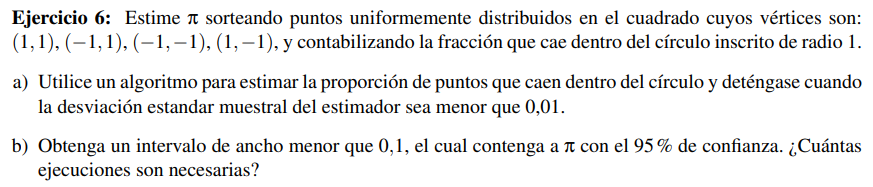

### a)

In [39]:
#@title Codigo
from random import random
from numpy import sqrt

def estimadores_de_X_ej6a(d):
    """
    Genera estimaciones de la media y la varianza de una distribución
    normal estándar utilizando simulaciones hasta que el error estándar
    sea menor o igual a un umbral `d`.
    """
    fun = lambda x,y : 1 if x**2+y**2 <= 1 else 0
    media = fun(random(), random())     # Primer valor de X
    var_acumulada = 0.0                 # Varianza acumulada (S^2)
    n = 1                               # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = fun(random(), random())

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2

    return media, var_acumulada, n

In [44]:
#@title Resultado
from random import seed
from scipy.stats import norm

seed(1) # Esto es para que no cambie el numero de simulaciones

print(" Resultado de la simulación ".center(49, "-"))
print(f"{'n_sim':^10} | {'pi':^10} | {'media':^10} | {'var':^10}")
print("-" * 49)
media, var, n = estimadores_de_X_ej6a(0.01)
print(f"{n:^10} | {media*4:^10.4f} | {media:^10.4f} | {var:^10.4f}")
print("-" * 49)


----------- Resultado de la simulación ----------
  n_sim    |     pi     |   media    |    var    
-------------------------------------------------
   1685    |   3.1430   |   0.7858   |   0.1684  
-------------------------------------------------


### b)

In [41]:
#@title Codigo
from random import random
from numpy import sqrt

def estimadores_de_X_ej6b(z_alfa_2, L):
    fun = lambda x,y : 1 if x**2+y**2 <= 1 else 0

    d = L / (2 * z_alfa_2)
    media = fun(random(),random())  # Primer valor de X
    var_acumulada = 0.0             # Varianza acumulada (S^2)
    n = 1                           # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = fun(random(),random())

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2

    intervalo = (media - z_alfa_2*sqrt(var_acumulada / n), media + z_alfa_2*sqrt(var_acumulada / n))
    return media, var_acumulada, intervalo, n

In [42]:
#@title Resultado
from random import seed
from scipy.stats import norm


confianza = 0.95
alfa = 1 - confianza
z_alfa_2 = abs(norm.ppf(alfa/ 2))

seed(1) # Esto es para que no cambie el numero de simulaciones

print("\n" + " Resultado de la simulación ".center(60, "-"))
print(f"{'n_sim':>10} | {'pi':^10} | {'IC (95%)':^16} | {'Long. IC':>10}")
print("-" * 60)
media, _, intervalo, n = estimadores_de_X_ej6b(z_alfa_2, 0.1)
long_ic = intervalo[1] - intervalo[0]
print(f"{n:>10} | {media*4:^10.4f} | ({intervalo[0]:.4f}, {intervalo[1]:.4f}) | {long_ic:10.4f}")
print("-" * 60)


---------------- Resultado de la simulación ----------------
     n_sim |     pi     |     IC (95%)     |   Long. IC
------------------------------------------------------------
       265 |   3.1245   | (0.7313, 0.8310) |     0.0998
------------------------------------------------------------


## Ejercicio 7

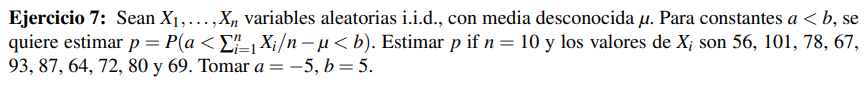

In [76]:
#@title Codigo
from random import choices, seed

seed(1)

# Datos
X = [56, 101, 78, 67, 93, 87, 64, 72, 80, 69]
n = len(X)
a,b = -5, 5

B = 10_000  # número de réplicas bootstrap

media_original = sum(X) / n

conteo_dentro_intervalo = 0
for _ in range(B):
    muestra = choices(X, k=n)
    media_muestral = sum(muestra) / n
    diferencia = media_muestral - media_original
    if a < diferencia < b:
        conteo_dentro_intervalo += 1

p_estimado = conteo_dentro_intervalo / B

print(f"Estimación bootstrap de p: {p_estimado:.4f}")

Estimación bootstrap de p: 0.7652


## Ejercicio 8

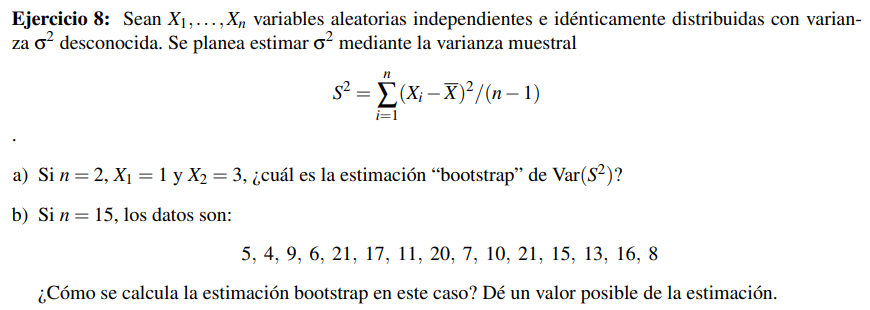

### a)

#### Parte Teorica

Sea:

$$
\hat{θ} = S^2 =\frac{1}{n-1}⋅\sum_{i=1}^{n}( X_{i} - \overline{X})^2
$$

Se tiene una $n=2$ con $X_1 = 1$ y $X_2 = 3$.

Por lo tanto tenemos un total de $n^n = 2^2 = 4$ muestras boostrap posibles. Las cuales son:

$$
b_1 = (1,1),\; b_2 = (1,3),\; b_3 = (3,1)\; y\; b_4 =(3,3)
$$

Asique podemos calcula la estimación ideal. En cada uno vamos a calcular:

> **Caso j**:
>
>$\overline{X}^{(b_j)} = ( b_{j,1} + b_{j,2} )/2 $
>
> $\hat{θ}^{(b_j)} = S^{2(b_j)} = \frac{1}{2-1}⋅\sum_{i=1}^{2}( b_{j,i} - \overline{X}^{(b_j)})^2$

Para ello vamos por casos:

> **Caso 1**:  $b_1 = (1,1)$
>
> $\overline{X}^{(b_1)} = (1+1)/2 = 1$
>
> $\hat{θ}^{(b_1)} = S^{2(b_2)} = \frac{(1-1)^2 + (1-1)^2}{2-1} = 0 + 0 = 0$

> **Caso 2**:  $b_2 = (1,3)$
>
> $\overline{X}^{(b_2)} = (1+3)/2 = 2$
>
> $\hat{θ}^{(b_2)} = S^{2(b_2)} = \frac{(1-2)^2 + (3-2)^2}{2-1} = 1 + 1 = 2$

> **Caso 3**:  $b_3 = (3,1)$
>
> $\overline{X}^{(b_3)} = (3+1)/2 = 2$
>
> $\hat{θ}^{(b_3)} = S^{2(b_3)} = \frac{(3-2)^2 + (1-2)^2}{2-1} = 1 + 1 = 2$

> **Caso 4**:  $b_4 = (3,3)$
>
> $\overline{X}^{(b_4)} = (3+3)/2 = 3$
>
> $\hat{θ}^{(b_4)} = S^{2(b_4)} = \frac{(3-3)^2 + (3-3)^2}{2-1} = 0 + 0 = 0$

Finalmente tenemos que:

$$
Var(S^2) = Var(\hat{θ}) = E[(\hat{θ} - E[\hat{θ}])^2]
$$

Nos falta calcular:

$$
E[\hat{θ}] = \overline{\hat{θ}} = (\hat{θ}^{(b_1)}+\hat{θ}^{(b_2)}+\hat{θ}^{(b_3)}+\hat{θ}^{(b_4)})/4 = (0+2+2+0)/4 = 1
$$

entonces:

\begin{align*}
Var(\hat{θ}) & = \frac{1}{n-1}⋅∑_{i=1}^n (\hat{θ}^{(b_i)} - \overline{\hat{θ}}) \\
& = \frac{(\hat{θ}^{(b_1)} - 1)^2+(\hat{θ}^{(b_2)} - 1)^2+ (\hat{θ}^{(b_3)} - 1)^2+(\hat{θ}^{(b_4)} - 1)^2}{4-1} \\
& = \frac{(0 - 1)^2+(2 - 1)^2+ (2 - 1)^2+(0 - 1)^2}{3} \\
& = \frac{1+1+1+1}{3} \\
& = 4/3 \\
& = 1,3333
\end{align*}

#### Codigo

In [68]:
#@title Codigo Matematico
from itertools import product


muestra = [1, 3]

muestras_bootstrap = list(product(muestra, repeat=len(muestra)))

media_muestras_bootstrap = [sum(b) / len(b)  for b in muestras_bootstrap]

s_cuad_muestras_bootstrap = [
    sum((x - m)**2 for x in b) / (len(b)-1)
    for b, m in zip(muestras_bootstrap, media_muestras_bootstrap)
]

media_s_cuad_muestras_bootstrap = sum(s_cuad_muestras_bootstrap) / len(s_cuad_muestras_bootstrap)

var_s_cuad_muestras_bootstrap = sum((s_cuad - media_s_cuad_muestras_bootstrap)**2 for s_cuad in s_cuad_muestras_bootstrap) / (len(s_cuad_muestras_bootstrap)-1)

print(f"Var(s_quad) = {var_s_cuad_muestras_bootstrap:.4f}")

Var(s_quad) = 1.3333


In [71]:
# @title Codigo Modularizado
from itertools import product


def generar_todas_las_muestras_bootstrap(muestra_inicial):
    return list(product(muestra_inicial, repeat=len(muestra_inicial)))


def var_muestral(muestra):
    media_muestral = sum(muestra) / len(muestra)
    return sum((x - media_muestral) ** 2 for x in muestra) / (len(muestra) - 1)


s_cuad = var_muestral

muestra = [1, 3]
muestras_bootstrap = generar_todas_las_muestras_bootstrap(muestra)

s_cuad_muestras_bootstrap = [s_cuad(m) for m in muestras_bootstrap]

var_s_cuad_muestras_bootstrap = var_muestral(s_cuad_muestras_bootstrap)

print(f"Var(s_quad) = {var_s_cuad_muestras_bootstrap:.4f}")

Var(s_quad) = 1.3333


### b)

Para este caso no podemos calcular la esimación real porque son un monton de muestras, exactamente $15^{15} =437893890380859375$.
Por ello vamos a aplica monte carlo.

In [102]:
# @title Codigo
from random import choices, seed

seed(1)


def generar_muestras_bootstrap(muestra_inicial, B=10_000):
    return [choices(muestra_inicial, k=len(muestra_inicial)) for _ in range(B)]


def var_muestral(muestra):
    media_muestral = sum(muestra) / len(muestra)
    return sum((x - media_muestral) ** 2 for x in muestra) / (len(muestra) - 1)


B = 100_000
s_cuad = var_muestral

muestra = [5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8]
muestras_bootstrap = generar_muestras_bootstrap(muestra, B)

s_cuad_muestras_bootstrap = [s_cuad(m) for m in muestras_bootstrap]

var_s_cuad_muestras_bootstrap = var_muestral(s_cuad_muestras_bootstrap)

print(f"Var(s_quad) = {var_s_cuad_muestras_bootstrap:.4f}")

Var(s_quad) = 58.8244


## Ejercicio 9

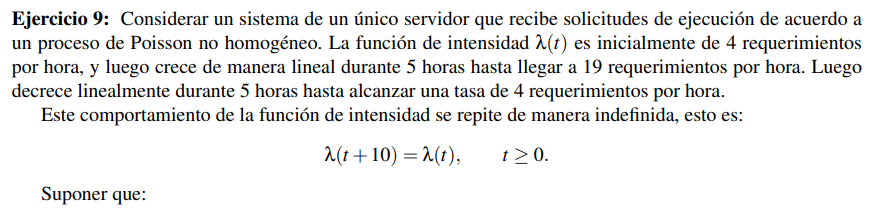
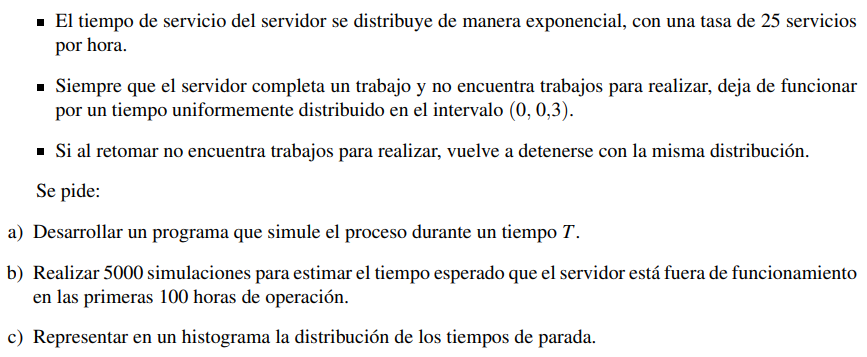